In [1]:
import pandas as pd

# Load CSV file into a DataFrame
df = pd.read_csv("C:/Users/akula/Downloads/Raji/movie_data.csv")
print(df.head(10))

   index      director_name  duration       actor_2_name  \
0      0      James Cameron     178.0   Joel David Moore   
1      1     Gore Verbinski     169.0      Orlando Bloom   
2      2         Sam Mendes     148.0       Rory Kinnear   
3      3  Christopher Nolan     164.0     Christian Bale   
4      4        Doug Walker       NaN         Rob Walker   
5      5     Andrew Stanton     132.0    Samantha Morton   
6      6          Sam Raimi     156.0       James Franco   
7      7       Nathan Greno     100.0       Donna Murphy   
8      8        Joss Whedon     141.0  Robert Downey Jr.   
9      9        David Yates     153.0   Daniel Radcliffe   

                                              genres     actor_1_name  \
0                    Action|Adventure|Fantasy|Sci-Fi      CCH Pounder   
1                           Action|Adventure|Fantasy      Johnny Depp   
2                          Action|Adventure|Thriller  Christoph Waltz   
3                                    Action|Thr

In [2]:
df = df.drop_duplicates()


In [3]:
df['imdb_score'] = pd.to_numeric(df['imdb_score'], errors='coerce')
df['duration'] = pd.to_numeric(df['duration'], errors='coerce')
df['title_year'] = pd.to_numeric(df['title_year'], errors='coerce')


In [4]:
df['director_name'] = df['director_name'].fillna("Unknown")
df['actor_1_name'] = df['actor_1_name'].fillna("Unknown")
df['actor_2_name'] = df['actor_2_name'].fillna("Unknown")
df['actor_3_name'] = df['actor_3_name'].fillna("Unknown")


In [5]:
df['movie_title'] = df['movie_title'].str.strip()


In [6]:
df = df.dropna(subset=['imdb_score'])


In [7]:
import pandas as pd

# List of possible numeric columns
numeric_cols = ['imdb_score', 'duration', 'title_year', 'num_voted_users', 'gross', 'budget']

# Only keep the ones that exist in your dataset
available_numeric_cols = [col for col in numeric_cols if col in df.columns]

# Convert them
for col in available_numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Strip text fields if present
if 'movie_title' in df.columns:
    df['movie_title'] = df['movie_title'].astype(str).str.strip()

# Drop unrealistic IMDb scores
if 'imdb_score' in df.columns:
    df = df[(df['imdb_score'] >= 0) & (df['imdb_score'] <= 10)]

# Drop unrealistic duration
if 'duration' in df.columns:
    df = df[df['duration'] <= 300]

# Add decade column if 'title_year' exists
if 'title_year' in df.columns:
    df['decade'] = (df['title_year'] // 10 * 10).astype('Int64')

print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 5024 entries, 0 to 5042
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5024 non-null   int64  
 1   director_name         5024 non-null   object 
 2   duration              5024 non-null   float64
 3   actor_2_name          5024 non-null   object 
 4   genres                5024 non-null   object 
 5   actor_1_name          5024 non-null   object 
 6   movie_title           5024 non-null   object 
 7   num_voted_users       5024 non-null   int64  
 8   actor_3_name          5024 non-null   object 
 9   movie_imdb_link       5024 non-null   object 
 10  num_user_for_reviews  5006 non-null   float64
 11  language              5011 non-null   object 
 12  country               5020 non-null   object 
 13  title_year            4921 non-null   float64
 14  imdb_score            5024 non-null   float64
 15  decade                4921

In [11]:
print(df.info())
print(df.head(3))


<class 'pandas.core.frame.DataFrame'>
Index: 5024 entries, 0 to 5042
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5024 non-null   int64  
 1   director_name         5024 non-null   object 
 2   duration              5024 non-null   float64
 3   actor_2_name          5024 non-null   object 
 4   genres                5024 non-null   object 
 5   actor_1_name          5024 non-null   object 
 6   movie_title           5024 non-null   object 
 7   num_voted_users       5024 non-null   int64  
 8   actor_3_name          5024 non-null   object 
 9   movie_imdb_link       5024 non-null   object 
 10  num_user_for_reviews  5006 non-null   float64
 11  language              5011 non-null   object 
 12  country               5020 non-null   object 
 13  title_year            4921 non-null   float64
 14  imdb_score            5024 non-null   float64
 15  decade                4921

In [12]:
# Dataset shape and info
print("Shape of dataset:", df.shape)
print("\nDataset Info:")
print(df.info())

# Summary statistics for numeric columns
print("\nSummary Statistics:")
print(df.describe())


Shape of dataset: (5024, 16)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 5024 entries, 0 to 5042
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5024 non-null   int64  
 1   director_name         5024 non-null   object 
 2   duration              5024 non-null   float64
 3   actor_2_name          5024 non-null   object 
 4   genres                5024 non-null   object 
 5   actor_1_name          5024 non-null   object 
 6   movie_title           5024 non-null   object 
 7   num_voted_users       5024 non-null   int64  
 8   actor_3_name          5024 non-null   object 
 9   movie_imdb_link       5024 non-null   object 
 10  num_user_for_reviews  5006 non-null   float64
 11  language              5011 non-null   object 
 12  country               5020 non-null   object 
 13  title_year            4921 non-null   float64
 14  imdb_score            5024 non-nu

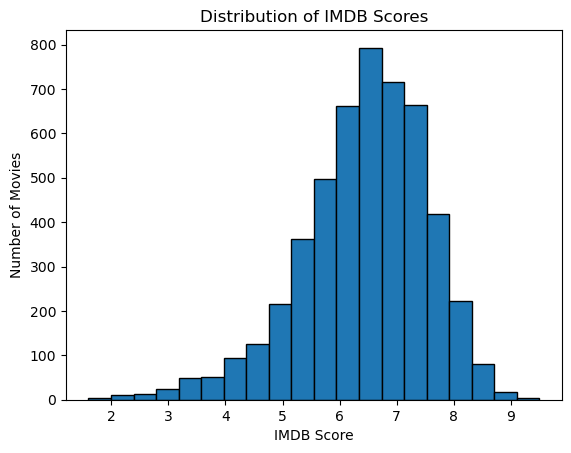

In [13]:
import matplotlib.pyplot as plt

plt.hist(df['imdb_score'], bins=20, edgecolor='black')
plt.xlabel('IMDB Score')
plt.ylabel('Number of Movies')
plt.title('Distribution of IMDB Scores')
plt.show()


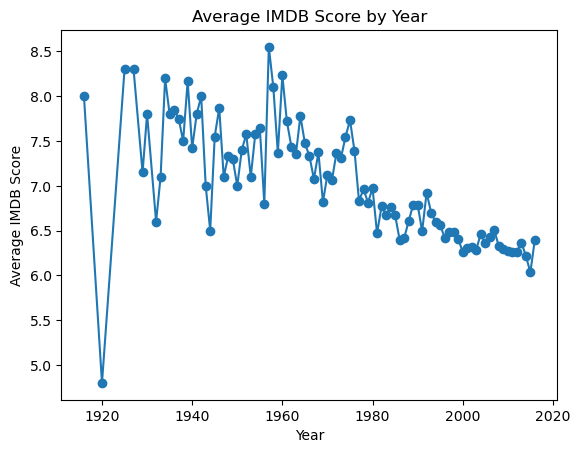

In [15]:
avg_score_per_year = df.groupby('title_year')['imdb_score'].mean()

plt.plot(avg_score_per_year.index, avg_score_per_year.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Average IMDB Score')
plt.title('Average IMDB Score by Year')
plt.show()


In [16]:
top_voted = df[['movie_title', 'num_voted_users', 'imdb_score']].sort_values(
    by='num_voted_users', ascending=False).head(10)
print(top_voted)


                                            movie_title  num_voted_users  \
1937                           The Shawshank Redemption          1689764   
66                                      The Dark Knight          1676169   
97                                            Inception          1468200   
683                                          Fight Club          1347461   
3355                                       Pulp Fiction          1324680   
836                                        Forrest Gump          1251222   
270   The Lord of the Rings: The Fellowship of the Ring          1238746   
654                                          The Matrix          1217752   
339       The Lord of the Rings: The Return of the King          1215718   
3466                                      The Godfather          1155770   

      imdb_score  
1937         9.3  
66           9.0  
97           8.8  
683          8.8  
3355         8.9  
836          8.8  
270          8.8  
654        

In [19]:
top_directors = df.groupby('director_name')['imdb_score'].mean().sort_values(ascending=False).head(10)
print(top_directors)


director_name
John Blanchard      9.5
Mitchell Altieri    8.7
Cary Bell           8.7
Sadyk Sher-Niyaz    8.7
Mike Mayhall        8.6
Charles Chaplin     8.6
Raja Menon          8.5
Ron Fricke          8.5
Majid Majidi        8.5
Damien Chazelle     8.5
Name: imdb_score, dtype: float64


In [20]:
top_movies = df[['movie_title', 'imdb_score', 'title_year']].sort_values(
    by='imdb_score', ascending=False).head(10)
print(top_movies)


                   movie_title  imdb_score  title_year
2765          Towering Inferno         9.5         NaN
1937  The Shawshank Redemption         9.3      1994.0
3466             The Godfather         9.2      1972.0
2824                   Dekalog         9.1         NaN
4409      Kickboxer: Vengeance         9.1      2016.0
3207                   Dekalog         9.1         NaN
3481                     Fargo         9.0         NaN
2837    The Godfather: Part II         9.0      1974.0
66             The Dark Knight         9.0      2008.0
1874          Schindler's List         8.9      1993.0


In [21]:
from collections import Counter

actors = df['actor_1_name'].dropna().tolist() + df['actor_2_name'].dropna().tolist() + df['actor_3_name'].dropna().tolist()
actor_counts = Counter(actors).most_common(10)

print("Top 10 most frequent actors:", actor_counts)


Top 10 most frequent actors: [('Robert De Niro', 54), ('Morgan Freeman', 47), ('Johnny Depp', 41), ('Unknown', 41), ('Bruce Willis', 40), ('Matt Damon', 38), ('Steve Buscemi', 37), ('Liam Neeson', 34), ('Brad Pitt', 34), ('Nicolas Cage', 34)]


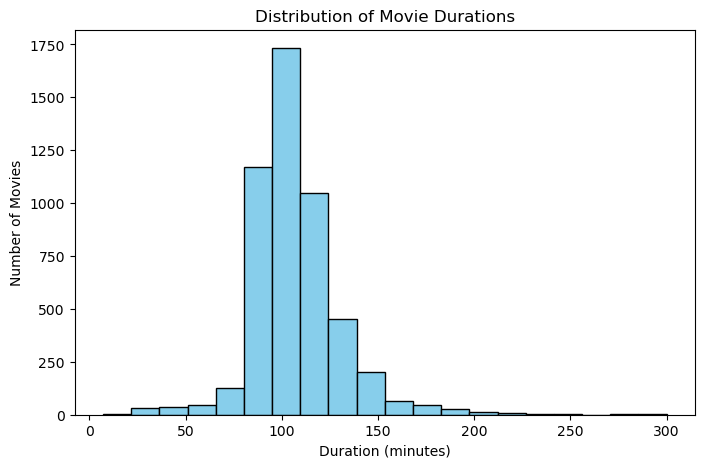

In [22]:
plt.figure(figsize=(8,5))
plt.hist(df['duration'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movie Durations')
plt.show()


In [23]:
lang_score = df.groupby('language')['imdb_score'].mean().sort_values(ascending=False).head(10)
print(lang_score)


language
Telugu        8.4000
Polish        8.2500
Indonesian    7.9000
Maya          7.8000
Hebrew        7.5800
Persian       7.5750
Dari          7.5000
Dzongkha      7.5000
Danish        7.5000
Portuguese    7.4875
Name: imdb_score, dtype: float64


In [24]:
country_score = df.groupby('country')['imdb_score'].mean().sort_values(ascending=False).head(10)
print(country_score)


country
Kyrgyzstan              8.700000
Libya                   8.400000
United Arab Emirates    8.200000
Egypt                   8.100000
Soviet Union            8.100000
Iran                    7.725000
Poland                  7.620000
Indonesia               7.600000
Israel                  7.525000
Sweden                  7.516667
Name: imdb_score, dtype: float64


In [32]:
pivot = df.pivot_table(values='imdb_score', index='director_name', aggfunc='mean').sort_values(by='imdb_score', ascending=False).head(10)
print(pivot)


                  imdb_score
director_name               
John Blanchard           9.5
Mitchell Altieri         8.7
Cary Bell                8.7
Sadyk Sher-Niyaz         8.7
Mike Mayhall             8.6
Charles Chaplin          8.6
Raja Menon               8.5
Ron Fricke               8.5
Majid Majidi             8.5
Damien Chazelle          8.5


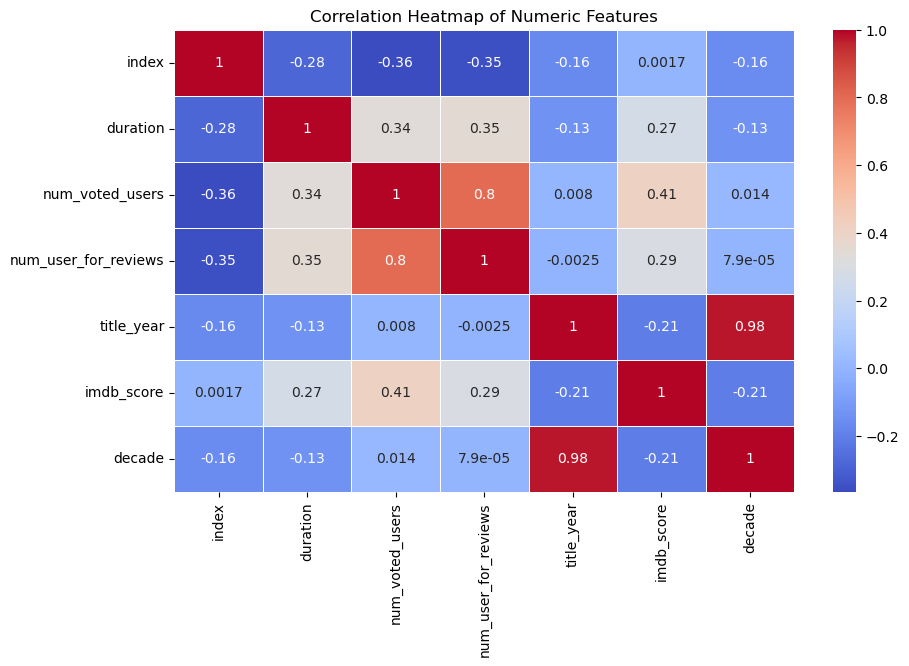

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Correlation matrix
corr = numeric_df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


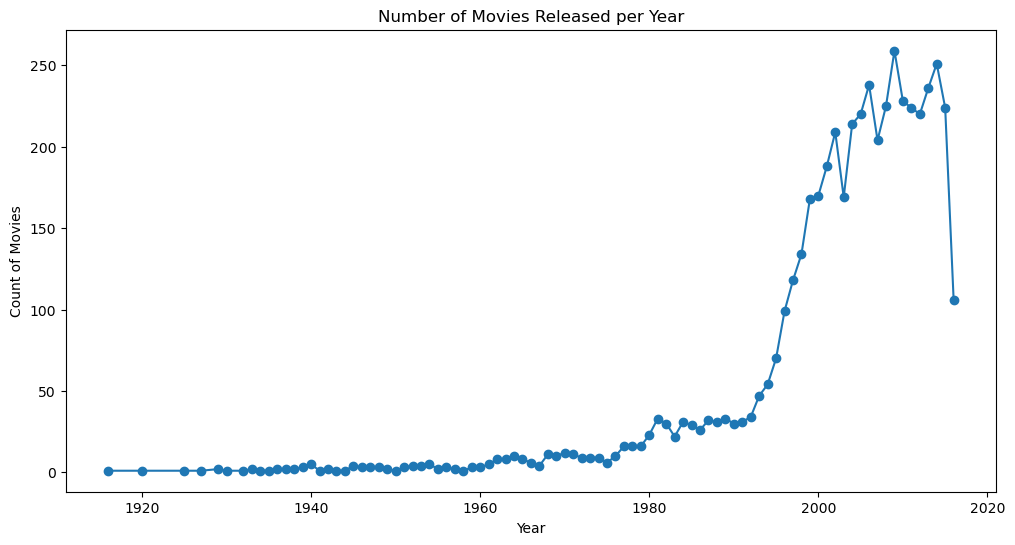

In [27]:
movies_per_year = df['title_year'].value_counts().sort_index()

plt.figure(figsize=(12,6))
movies_per_year.plot(kind='line', marker='o')
plt.title("Number of Movies Released per Year")
plt.xlabel("Year")
plt.ylabel("Count of Movies")
plt.show()
